In [1]:
from imageai.Prediction import ImagePrediction
import os
import pandas as pd
import numpy as np
from PIL import Image
from gensim.models import Word2Vec
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
%matplotlib inline 


execution_path = os.getcwd()
prediction = ImagePrediction()
prediction.setModelTypeAsDenseNet()
prediction.setModelPath(os.path.join(execution_path, "/home/guest/Documents/Test1/ImageAI-master/imageai/Prediction/Weights/DenseNet.h5"))
prediction.loadModel()
TEST_PATH = '/home/guest/Documents/Aikomi'

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [2]:
def tag(TEST_PATH, prediction):
    pred_array = np.empty((0,6),dtype=object)
    for img in os.listdir(TEST_PATH):
        if img.endswith('.jpg'):
            image = Image.open(os.path.join(TEST_PATH, img))
            image = image.convert("RGB")
            image = np.array(image, dtype=np.uint8)
            predictions, probabilities = prediction.predictImage(os.path.join(TEST_PATH, img), result_count=5)
            temprow = np.zeros((1,pred_array.shape[1]),dtype=object)
            temprow[0,0] = img
            for i in range(len(predictions)):
                temprow[0,i+1] = predictions[i]
            pred_array = np.append(pred_array,temprow,axis=0)
    return pred_array

In [3]:
pred_array= tag(TEST_PATH, prediction)
print(np.shape(pred_array))
print(pred_array)

(354, 6)
[['1541565430897-Dog-maltese1.jpg' 'Maltese_dog' 'Lhasa' 'Shih-Tzu'
  'Japanese_spaniel' 'Tibetan_terrier']
 ['1534154099702-2017-01-06.jpg' 'alp' 'valley' 'seashore' 'lakeside'
  'volcano']
 ['1536925205335-0811wallpaper-5_1280.jpg' 'sandbar' 'geyser' 'seashore'
  'volcano' 'leatherback_turtle']
 ...
 ['1541064754434-download _1_.jpg' 'valley' 'cliff' 'lakeside' 'seashore'
  'alp']
 ['1540961836788-600600.jpg' 'hair_slide' 'bonnet' 'wig' 'wool'
  'hair_spray']
 ['1536924136635-0818wallpaper-7_1280.jpg' 'umbrella' 'parachute'
  'seashore' 'wreck' 'crutch']]


In [4]:
pred_array = tag(TEST_PATH, prediction)
def mapping(pred_array):
        all_tags = pred_array[:,1:2].reshape(1,-1).tolist()
        _in_sent = ' '.join(list(map(str,all_tags)))
        mappings = []
        for i in pred_array:
            for j in range(1):
                mappings.append([i[0],i[j+1]])
        return mappings, all_tags

In [5]:
mappings, all_tags=mapping(pred_array)
print(np.shape(mappings))
print(np.shape(all_tags))
print(mappings)

(354, 2)
(1, 354)
[['1541565430897-Dog-maltese1.jpg', 'Maltese_dog'], ['1534154099702-2017-01-06.jpg', 'alp'], ['1536925205335-0811wallpaper-5_1280.jpg', 'sandbar'], ['1534160719354-0811wallpaper-1_1280.jpg', 'cauliflower'], ['1541071465047-tree-736885__340.jpg', 'fountain'], ['0811wallpaper-8_1280.jpg', 'racket'], ['1541564513943-Bird-parakeet1.jpg', 'lorikeet'], ['1541564513810-Bird-finch1.jpg', 'kite'], ['1541076156450-0818wallpaper-10_1280.jpg', 'stone_wall'], ['1541075914699-0811wallpaper-8_1280.jpg', 'basketball'], ['1541487481511-volley ball.jpg', 'volleyball'], ['1541075383283-0817wallpaper-1_1600.jpg', 'pole'], ['1534238677268-0811wallpaper-8_1280.jpg', 'racket'], ['1541487407489-parade2.jpg', 'typewriter_keyboard'], ['1541485075251-Ashoka.jpg', 'torch'], ['1541564479593-Bird-finch3.jpg', 'hen'], ['1540800980622-BingWallpaper-2017-08-27.jpg', 'cliff'], ['1541484566715-marcus-aurelius.jpg', 'mask'], ['1540963949863-0811wallpaper-2_1280.jpg', 'coil'], ['1540788131615-DigitalGlob

In [6]:
print(np.shape(all_tags))

(1, 354)


In [7]:
mappings,_ = mapping(pred_array)
_,all_tags= mapping(pred_array)
def w2v(all_tags):
    model = Word2Vec(all_tags, min_count=1, size=2, alpha=0.025)
    words = list(model.wv.vocab)
    vector = list()
    for word in all_tags[0]:
        vector.append(model[word])
    return vector, words

In [8]:
vector, words=w2v(all_tags)
print(np.shape(vector))

(354, 2)


/home/guest/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  


In [9]:
print(np.shape(words))

(118,)


In [10]:
def imglst(vector, mappings):
    image_name = []
    for i in range(len(all_tags[0])):
        image_name.append(mappings[i][0])
    return image_name

In [11]:
image_name=imglst(vector, mappings)
print(np.shape(image_name))
print(image_name)

(354,)
['1541565430897-Dog-maltese1.jpg', '1534154099702-2017-01-06.jpg', '1536925205335-0811wallpaper-5_1280.jpg', '1534160719354-0811wallpaper-1_1280.jpg', '1541071465047-tree-736885__340.jpg', '0811wallpaper-8_1280.jpg', '1541564513943-Bird-parakeet1.jpg', '1541564513810-Bird-finch1.jpg', '1541076156450-0818wallpaper-10_1280.jpg', '1541075914699-0811wallpaper-8_1280.jpg', '1541487481511-volley ball.jpg', '1541075383283-0817wallpaper-1_1600.jpg', '1534238677268-0811wallpaper-8_1280.jpg', '1541487407489-parade2.jpg', '1541485075251-Ashoka.jpg', '1541564479593-Bird-finch3.jpg', '1540800980622-BingWallpaper-2017-08-27.jpg', '1541484566715-marcus-aurelius.jpg', '1540963949863-0811wallpaper-2_1280.jpg', '1540788131615-DigitalGlobe_WorldView2_50cm_8bit_Pansharpened_RGB_DRA_Rome_Italy_2009DEC10_8bits_sub_r_1_BIGFILE.jpg', '1536924133586-0818wallpaper-3_1280.jpg', '1536228559386-0818wallpaper-10_1280.jpg', '1541484939119-Ashoka.jpg', '1541064418206-300400.jpg', '1541052655277-0817wallpaper-9

In [12]:
def co_ord(vector):
    Xaxis = list()
    yaxis = list()
    myarray = np.reshape(vector[:(np.shape(vector)[0])], 2*(np.shape(vector)[0]))
    for loop1 in range(2*(np.shape(vector)[0])):
        if(loop1%2 ==0):
            Xaxis.append(myarray[loop1])
        else:
            yaxis.append(myarray[loop1])
    X = np.vstack((Xaxis, yaxis)).T
    return X

In [13]:
X=co_ord(vector)
print(np.shape(X))
print(X)

(354, 2)
[[ 0.04344084  0.1263969 ]
 [-0.01977208  0.2516673 ]
 [-0.0367197   0.21816652]
 [-0.15422305  0.17065032]
 [ 0.07583056  0.1146009 ]
 [ 0.07699405  0.22380891]
 [ 0.18548803  0.23713964]
 [ 0.1260769   0.2153015 ]
 [ 0.2210254  -0.06421127]
 [ 0.1835738  -0.00960936]
 [-0.09219229  0.08711968]
 [-0.24063489  0.06679109]
 [ 0.07699405  0.22380891]
 [-0.06150658  0.11200558]
 [ 0.03129626 -0.1543452 ]
 [-0.13256706 -0.13827719]
 [ 0.12439086 -0.24452648]
 [ 0.21285562  0.07020591]
 [-0.23173676 -0.02610068]
 [ 0.12140958  0.08712532]
 [-0.12137561 -0.10474143]
 [ 0.2210254  -0.06421127]
 [ 0.03129626 -0.1543452 ]
 [ 0.09472584  0.15827078]
 [ 0.19582391 -0.15039721]
 [-0.14422825  0.03495646]
 [-0.05016611 -0.11269383]
 [ 0.12439086 -0.24452648]
 [ 0.19133317 -0.09643677]
 [ 0.19133317 -0.09643677]
 [-0.01977208  0.2516673 ]
 [ 0.00669424  0.13649324]
 [ 0.05222799  0.01909393]
 [-0.13803731 -0.03974151]
 [-0.24747248  0.05194634]
 [-0.24747248  0.05194634]
 [ 0.18934713  0.22

In [14]:
image_name=w2v(all_tags)
X=co_ord(vector)
def K_mean(X, image_name):
    kmeans = KMeans(n_clusters=4)
    kmeans.fit(X)
    y_kmeans = kmeans.predict(X)
    centers = kmeans.cluster_centers_
    plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis')
    plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);
    c = np.random.randint(1,5,size=522)
    
    norm = plt.Normalize(1,4)
    cmap = plt.cm.RdYlGn
    
    fig,ax = plt.subplots()
    sc = plt.scatter(X[:,0], X[:,1],c=y_kmeans, s=50, cmap='viridis')
    plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5)
    
    annot = ax.annotate("", xy=(0,0), xytext=(20,20),textcoords="offset points",
                        bbox=dict(boxstyle="round", fc="w"),
                        arrowprops=dict(arrowstyle="->"))
    annot.set_visible(False)
    
    def update_annot(ind):
        pos = sc.get_offsets()[ind["ind"][0]]
        annot.xy = pos
        text = "{}, {}".format(" ".join(list(map(str,ind["ind"]))), 
                               " ".join([image_name[n] for n in ind["ind"]]))
        annot.set_text(text)
        annot.get_bbox_patch().set_facecolor(cmap(norm(c[ind["ind"][0]])))
        annot.get_bbox_patch().set_alpha(0.4)
    
    
    def hover(event):
        vis = annot.get_visible()
        if event.inaxes == ax:
            cont, ind = sc.contains(event)
            if cont:
                update_annot(ind)
                annot.set_visible(True)
                fig.canvas.draw_idle()
            else:
                if vis:
                    annot.set_visible(False)
                    fig.canvas.draw_idle()
    fig.canvas.mpl_connect("motion_notify_event", hover)
    return y_kmeans,centers

/home/guest/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  


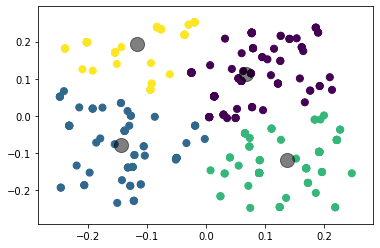

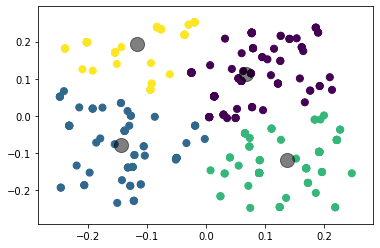

In [15]:
y_kmeans,centers=K_mean(X, image_name)
# print(np.shape(y_kmeans))
# print(np.shape(centers))

In [16]:
def clustdf(mappings):
    cluster_center = list()
    for center in range(len(X)):
        cluster_center.append(y_kmeans[center])
    cluster_df = pd.DataFrame(mappings, columns=['Image_name','First_Tag'])
    cluster_df['cluster_center'] = cluster_center
    df_cluster1 = cluster_df[cluster_df['cluster_center']==0]
    df_cluster2 = cluster_df[cluster_df['cluster_center']==1]
    df_cluster3 = cluster_df[cluster_df['cluster_center']==2]
    df_cluster4 = cluster_df[cluster_df['cluster_center']==3]
    return cluster_df, df_cluster1, df_cluster2, df_cluster3, df_cluster4

In [17]:
cluster_df, df_cluster1, df_cluster2, df_cluster3, df_cluster4 = clustdf(mappings)
cluster_df.head()

,Image_name,First_Tag,cluster_center
0,1541565430897-Dog-maltese1.jpg,Maltese_dog,0
1,1534154099702-2017-01-06.jpg,alp,3
2,1536925205335-0811wallpaper-5_1280.jpg,sandbar,3
3,1534160719354-0811wallpaper-1_1280.jpg,cauliflower,3
4,1541071465047-tree-736885__340.jpg,fountain,0


In [18]:
df_cluster2.head()

,Image_name,First_Tag,cluster_center
11,1541075383283-0817wallpaper-1_1600.jpg,pole,1
15,1541564479593-Bird-finch3.jpg,hen,1
18,1540963949863-0811wallpaper-2_1280.jpg,coil,1
20,1536924133586-0818wallpaper-3_1280.jpg,cardoon,1
25,1540988911126-BingWallpaper-2017-08-29.jpg,great_white_shark,1


In [19]:
cluster_center = list()
for center in range(len(X)):
    cluster_center.append(y_kmeans[center])
print(np.shape(cluster_center))

(354,)
